In [27]:
import cv2
from skimage.util import img_as_float, img_as_ubyte
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu

In [2]:
VERTEBRA_PATH = "data/vertebra.png"

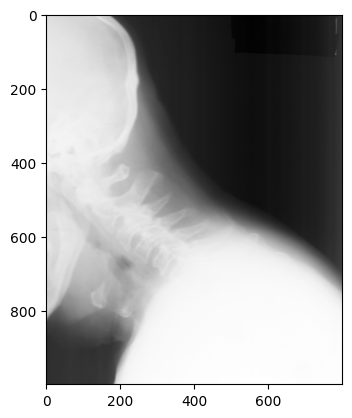

In [3]:
img = io.imread(VERTEBRA_PATH)
img = img_as_float(img)
img = img_as_ubyte(img)

plt.imshow(img, cmap='gray')

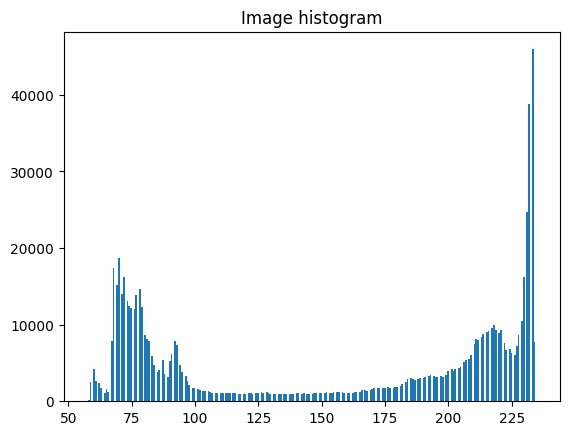

In [4]:
# histogram of image
h = plt.hist(img.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [5]:
print(img.min(), img.max())

57 235


In [6]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
	
    # Do something here
    img_out = (max_desired - min_desired) / (max_val - min_val) * (img_float - min_val) + min_desired

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

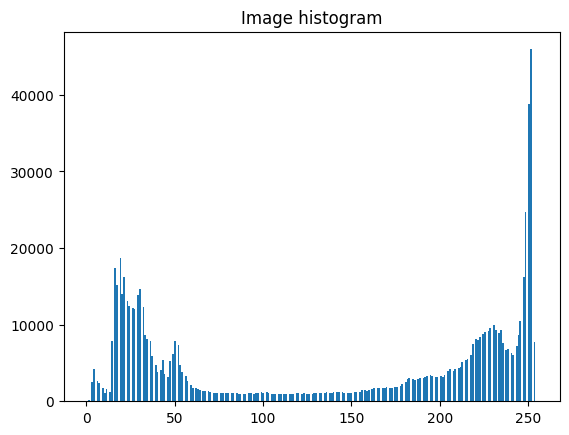

In [7]:
# histogram of image
img_stretch = histogram_stretch(img)
h = plt.hist(img_stretch.ravel(), bins=256)
plt.title('Image histogram')
io.show()

Text(0.5, 1.0, 'Stretched image')

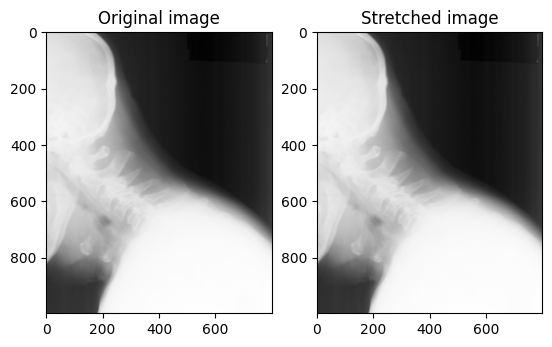

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_stretch, cmap='gray')
ax[1].set_title('Stretched image')

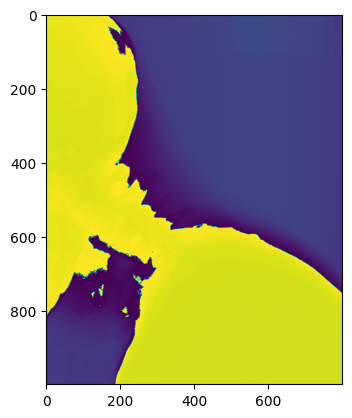

In [9]:
plt.imshow(img_as_ubyte(img) - img_stretch)

In [10]:
def gamma_map(img, gamma):
    """
    Performs a gamma correction mapping on the input image
    :param img: Input image
    :param gamma: Gamma value
    :return: Image, where the gamma correction mapping has been applied
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img)

    
    # Do something here
    img_out = img_float ** gamma

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)

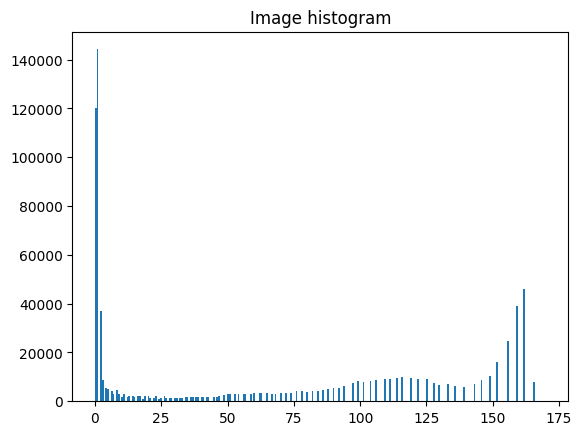

Text(0.5, 1.0, 'Gamma image')

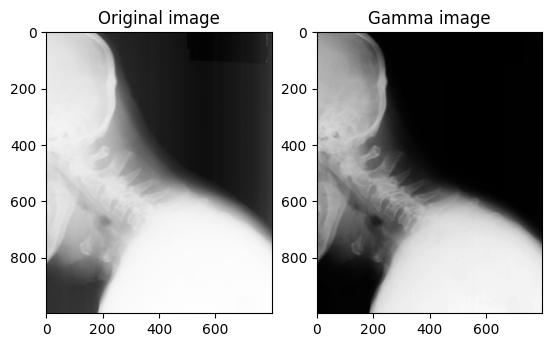

In [13]:
# histogram of image


img_gamma = gamma_map(img, 5)
plt.hist(img_gamma.ravel(), bins=256)
plt.title('Image histogram')
plt.show()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(img_gamma, cmap='gray')
ax[1].set_title('Gamma image')

In [16]:
def threshold_image(img_in, thres: int | float | list[float] | list[int]):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    
    if isinstance(thres, list):
        raise NotImplementedError("Not implemented for list")
    elif isinstance(thres, int) or isinstance(thres, float):
        img_out = np.zeros(img_in.shape)
        img_out[img_in > thres] = 1
    
    return img_out
    

Text(0.5, 1.0, 'Gamma image')

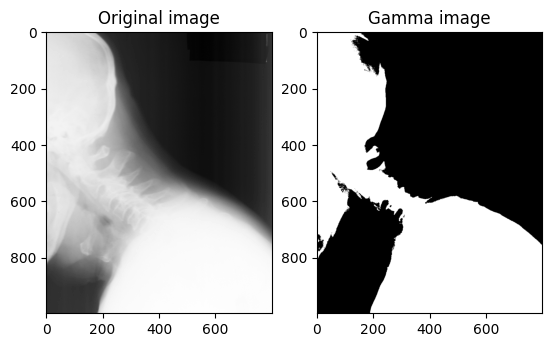

In [25]:
plt.show()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(threshold_image(img, 200), cmap='gray')
ax[1].set_title('Gamma image')

Text(0.5, 1.0, 'Gamma image')

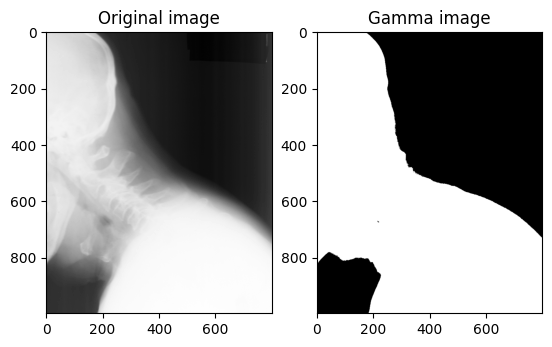

In [29]:
thres = threshold_otsu(img)
plt.show()
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(threshold_image(img, thres), cmap='gray')
ax[1].set_title('Gamma image')